<a href="https://colab.research.google.com/github/Erika2397/Analise_Series_Temporais/blob/main/Series_Temporais_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Alucar Analisando as Vendas**

In [1]:
# importando biblioteca pandas
import pandas as pd

In [2]:
# Lendo o arquivo csv
alucar = pd.read_csv('https://github.com/Erika2397/Analise_Series_Temporais/raw/main/material%2Bcurso%2B-%2BTime%2BSeries/material%20curso%20-%20Time%20Series/alucar.csv')

In [3]:
# Verificando os 5 primeiros
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
# Olhando o tamanho do DataFrame
print('Quantidade de linhas e colunas é: ', alucar.shape)

Quantidade de linhas e colunas é:  (24, 2)


In [5]:
# Analisando dados nulos
print('Quantidade de dados nulos: ', alucar.isna().sum().sum())

Quantidade de dados nulos:  0


In [6]:
# Verificando quais são os tipos de dados do DataFrame
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [7]:
# Transformando a coluna mes no tipo DateTime
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [8]:
# Importando Seaborn e Matplotlib
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [9]:
!pip show seaborn

Name: seaborn
Version: 0.11.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.6/dist-packages
Requires: scipy, numpy, pandas, matplotlib
Required-by: missingno


## Gráficos

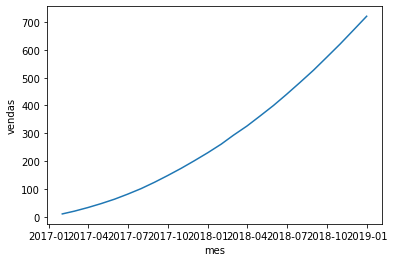

In [10]:
# Plotando o gráfico de linha
sns.lineplot(x='mes', y='vendas', data=alucar)

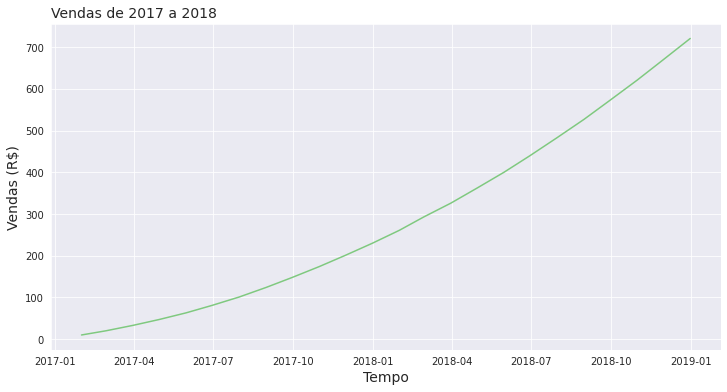

In [11]:
# Melhorando o gráfico
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas de 2017 a 2018', loc='left', fontsize=14)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

De acordo ao gráfico, podemos observar que a medida que o tempo vai passando, nossas vendas vão aumentando.

## Descomposição e autocorrelação

In [12]:
# Visualizando os 5 primeiros
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [13]:
# Descompondo as vendas
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


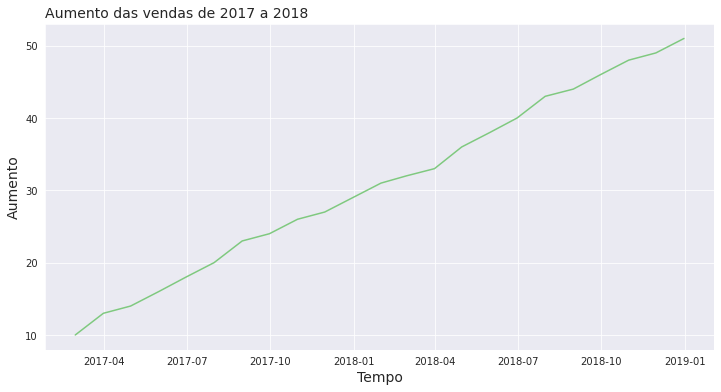

In [14]:
# Plotando o gráfico
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas de 2017 a 2018', loc='left', fontsize=14)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [15]:
# Criando uma função para plotar o gráfico
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc='left', fontsize=14)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

In [16]:
# Vendo a aceleração do aumento das vendas / Descompondo
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


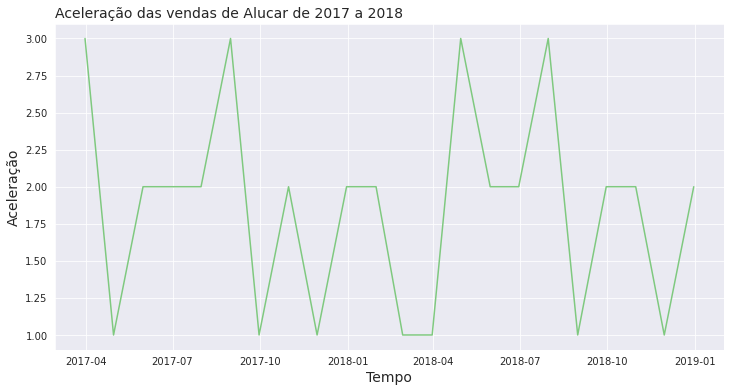

In [17]:
# Plotando o gráfico
plotar('Aceleração das vendas de Alucar de 2017 a 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

In [18]:
# Fazendo a comparação dos três gráficos em um só. 
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax

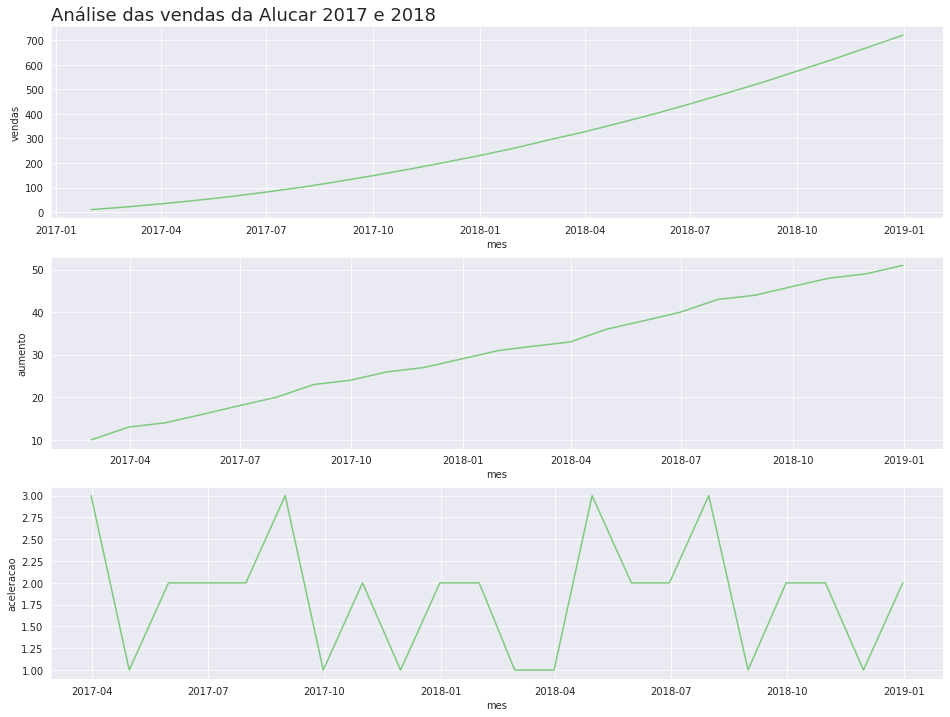

In [19]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise das vendas da Alucar 2017 e 2018')

In [20]:
# Importando biblioteca de autocorrelação
from pandas.plotting import autocorrelation_plot

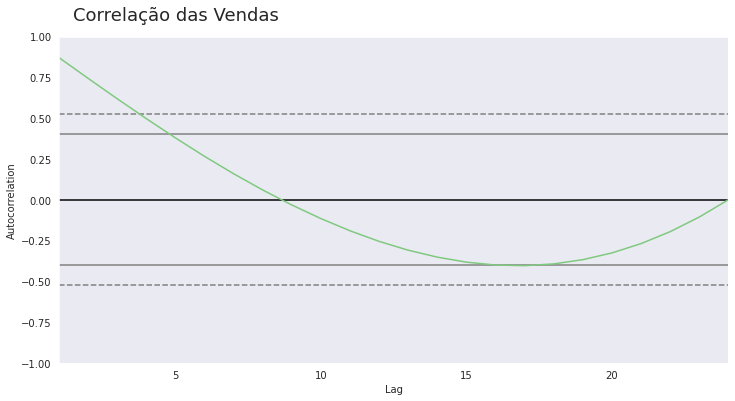

In [21]:
# Autocorrelação das vendas
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

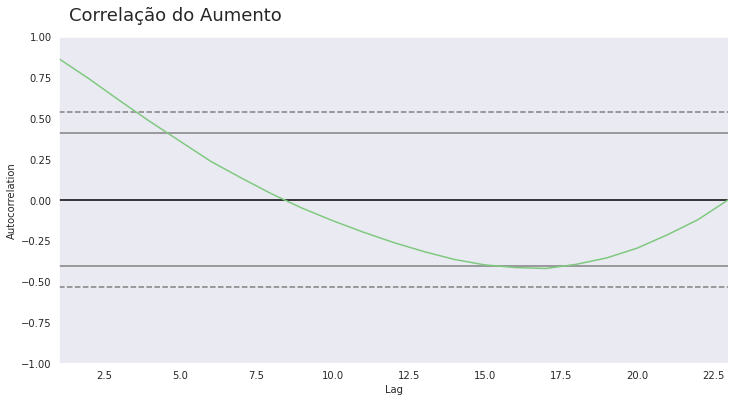

In [23]:
# Autocorrelação do aumento das vendas
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax=ax

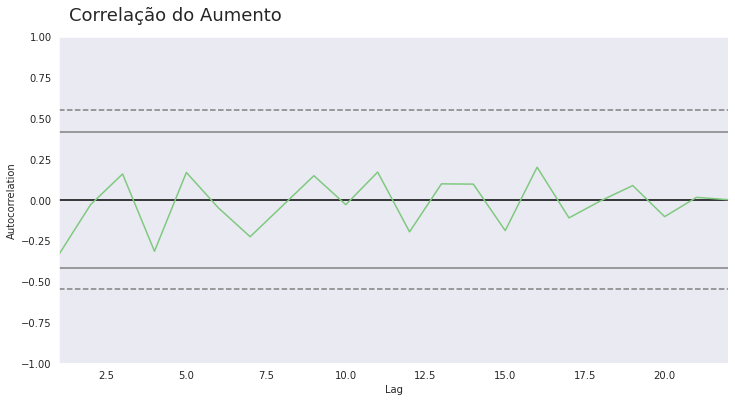

In [24]:
# Autocorrelação da aceleração do aumento das vendas
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax=ax